# Estudio con datos del covid. 
 La base de datos se encuentra en 
(http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip).
Se hizo un muestra aleatoria de 10000 observaciones como un muestreo aleatorio. Esta base me parece importante, puesto por que es algo importante, como conocer una enfermedad nueva, como notar las acciones adecuadas y las desisiones tomadas con datos. 

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para hacer gráficas
import seaborn as sns # para hacer gráficas mas bonitas que plt

%matplotlib inline

In [2]:
# Importar datos, estamos importando un archivos csv
df_covid = pd.read_csv("datos.csv", encoding='latin-1')

In [3]:
# Nombre de las columnas
np.array(df_covid.columns).reshape(5,8)

array([['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
        'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES'],
       ['MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
        'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD'],
       ['NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
        'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR'],
       ['HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
        'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB'],
       ['RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
        'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD',
        'PAIS_ORIGEN', 'UCI']], dtype=object)

In [4]:
# Eliminar las observaciones nulas
df_covid = df_covid.dropna()

In [5]:
# Deacuerdo a la página donde de obtienen los datos, 1,2 y 3 
# corresponden a casos registrados como defunciones
df_covid = df_covid[(df_covid.CLASIFICACION_FINAL == 1) | (df_covid.CLASIFICACION_FINAL == 2) | (df_covid.CLASIFICACION_FINAL == 3) ]
df_covid

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
94,2020-12-25,17c85e,2,12,15,1,15,15,70,2,...,1,1,1,2,97,3,99,MÃ©xico,97,1
142,2020-12-25,393aa3,1,4,32,1,32,32,10,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
313,2020-12-25,21d8cf,1,12,22,2,22,22,14,2,...,1,1,1,1,2,3,99,MÃ©xico,97,2
367,2020-12-25,3ce1a8,1,4,13,2,13,13,51,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
415,2020-12-25,1298c5,2,12,24,2,24,24,16,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99885,2020-12-25,048745,1,4,2,2,18,2,2,2,...,99,1,1,2,97,3,99,MÃ©xico,97,2
99890,2020-12-25,353602,2,6,9,1,9,9,17,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
99896,2020-12-25,274426,2,4,8,1,8,8,32,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
99917,2020-12-25,2fd181,2,4,26,2,26,26,29,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2


In [6]:
# Las filas y las columnas de los filtros anteriores
df_covid.shape

(3564, 40)

In [7]:
# Vista previa de los datos
df_covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
94,2020-12-25,17c85e,2,12,15,1,15,15,70,2,...,1,1,1,2,97,3,99,MÃ©xico,97,1
142,2020-12-25,393aa3,1,4,32,1,32,32,10,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
313,2020-12-25,21d8cf,1,12,22,2,22,22,14,2,...,1,1,1,1,2,3,99,MÃ©xico,97,2
367,2020-12-25,3ce1a8,1,4,13,2,13,13,51,2,...,2,1,1,2,97,3,99,MÃ©xico,97,2
415,2020-12-25,1298c5,2,12,24,2,24,24,16,1,...,2,1,1,2,97,3,99,MÃ©xico,97,97


In [8]:
# Estadisticas básicas de los datos. Reconocer la situación de los datos.
df_covid.describe

<bound method NDFrame.describe of       FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
94             2020-12-25      17c85e       2      12          15     1   
142            2020-12-25      393aa3       1       4          32     1   
313            2020-12-25      21d8cf       1      12          22     2   
367            2020-12-25      3ce1a8       1       4          13     2   
415            2020-12-25      1298c5       2      12          24     2   
...                   ...         ...     ...     ...         ...   ...   
99885          2020-12-25      048745       1       4           2     2   
99890          2020-12-25      353602       2       6           9     1   
99896          2020-12-25      274426       2       4           8     1   
99917          2020-12-25      2fd181       2       4          26     2   
99995          2020-12-25      0f5411       2       4          30     2   

       ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE  ..

In [9]:
# Matriz de correlación.
corrmat = df_covid.corr()

<AxesSubplot:>

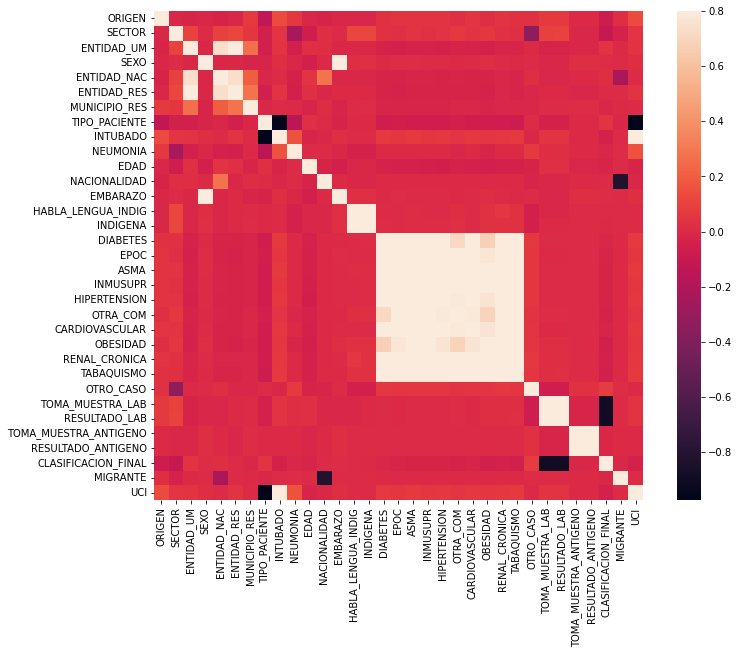

In [10]:
# mapa de calor
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)

In [11]:
data = pd.concat([df_covid["FECHA_SINTOMAS"],df_covid["EDAD"]], axis= 1)

In [12]:
data = data.sort_values('FECHA_SINTOMAS', ascending = True)

In [13]:
data.head()

,FECHA_SINTOMAS,EDAD
896,2020-03-14,57
49762,2020-03-16,56
60609,2020-03-16,82
66806,2020-03-16,49
23496,2020-03-20,81


<AxesSubplot:xlabel='FECHA_SINTOMAS', ylabel='EDAD'>

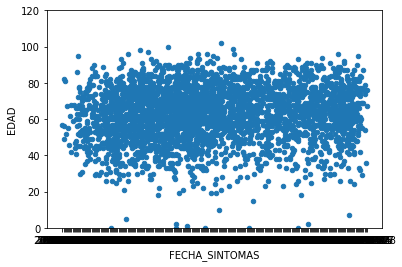

In [14]:
data.plot.scatter(x = "FECHA_SINTOMAS" , y = "EDAD", ylim=(0,120))

In [15]:
# Vamos a hacer que la variable CLASIFICACION_FINAL sea una categorica
df_covid["TABAQUISMO"] = df_covid["TABAQUISMO"].astype("category")

(-0.5, 2.5, 0.0, 120.0)

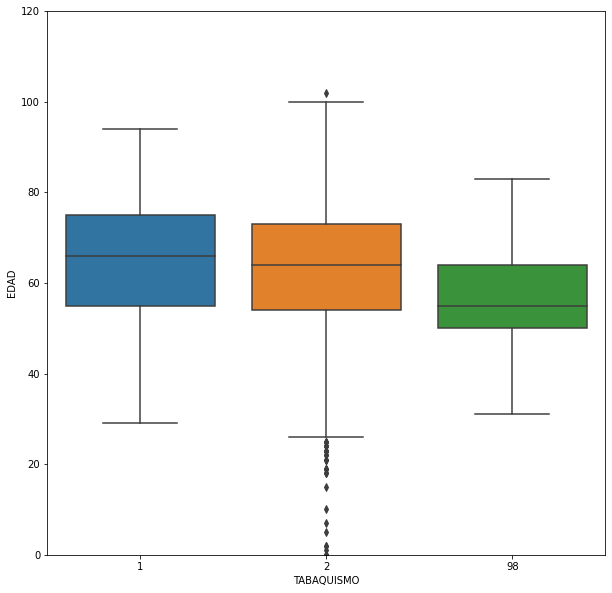

In [16]:
# Vamos hacer un gráfico en dos variables.
var = "TABAQUISMO"
f, ax = plt.subplots(figsize = (10,10)) # subplot
fig = sns.boxplot(x = var, y = "EDAD", data = df_covid) # gráfico de caja
fig.axis(ymin=0,ymax=120) # los parametro del eje y